In [13]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Cargar el archivo CSV
file_path = '/home/ig/Desktop/prueba/cleaned_dataset.csv'  # Reemplaza con la ruta correcta a tu archivo
df = pd.read_csv(file_path)

# Crear listas separadas para cada clase
anchos = [row['ancho'] for _, row in df.iterrows()]
largos = [row['largo'] for _, row in df.iterrows()]


[22.0, 25.0, 13.0, 29.0, 22.0, 20.0, 21.0, 23.0, 23.0, 26.0, 23.0, 20.0, 16.0, 17.0, 26.0, 28.0, 21.0, 18.0, 28.0, 21.0, 18.0, 21.0, 20.0, 20.0, 21.0, 24.0, 21.0, 20.0, 22.0, 16.0, 17.0, 17.0, 14.0, 18.0, 15.0, 15.0, 16.0, 16.0, 19.0, 18.0, 15.0, 17.0, 10.0, 10.0, 16.0, 10.0, 15.0, 20.0, 20.0, 17.0, 12.0, 15.0, 20.0, 22.0, 12.0, 21.0, 20.0, 21.0, 16.0, 20.0, 20.0, 20.0, 19.0, 22.0, 22.0, 21.0, 21.0, 23.0, 15.0, 21.0, 21.0, 21.0, 18.0, 15.0, 18.0, 20.0, 15.0, 19.0, 20.0, 31.0, 28.0, 25.0, 33.0, 32.0, 27.0, 33.0, 34.0, 26.0, 35.0, 31.0, 29.0, 23.0, 27.0, 22.0, 23.0, 22.0, 18.0, 13.0, 22.0, 30.0, 31.0, 34.0, 27.0, 26.0, 28.0, 27.0, 29.0, 29.0, 28.0, 29.0, 34.0, 28.0, 36.0, 31.0, 26.0, 34.0, 32.0, 33.0, 35.0, 25.0, 30.0, 25.0, 24.0, 20.0, 26.0, 25.0, 23.0, 20.0, 23.0, 25.0, 32.0, 24.0, 28.0, 32.0, 22.0, 25.0, 28.0, 25.0, 23.0, 20.0, 22.0, 24.0, 31.0, 34.0, 30.0, 22.0, 24.0, 25.0, 23.0, 23.0, 34.0, 35.0, 22.0, 31.0, 24.0, 25.0, 29.0, 21.0, 33.0, 28.0, 27.0, 28.0, 29.0, 24.0, 24.0, 28.0, 30.

1)

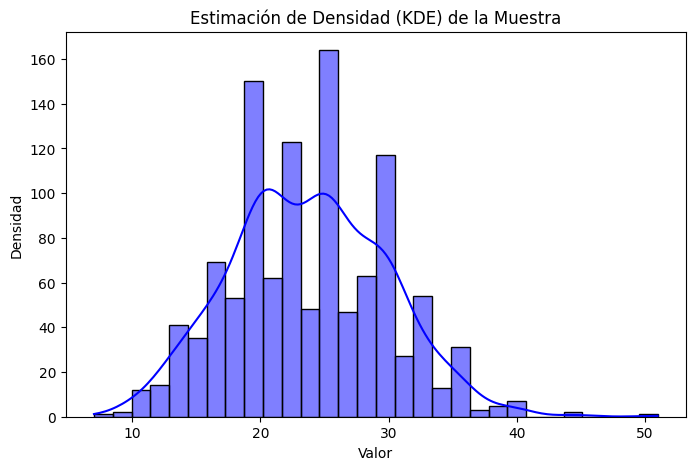

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(anchos, bins=30, kde=True, color='blue')  # Histograma con KDE
plt.title('Estimación de Densidad (KDE) de la Muestra')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

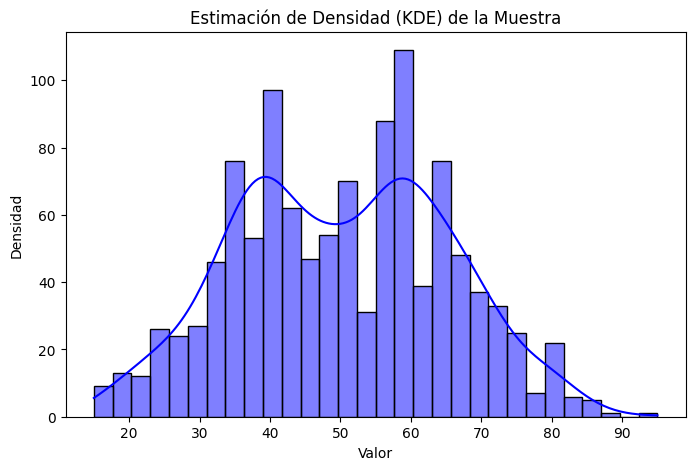

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(largos, bins=30, kde=True, color='blue')  # Histograma con KDE
plt.title('Estimación de Densidad (KDE) de la Muestra')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

2)

/tmp/ipykernel_6842/145003557.py:12: RuntimeWarning: invalid value encountered in log
  Z0 = np.sqrt(-2 * np.log(anchosNormalizados)) * np.cos(2 * np.pi * largosNormalizadas)
/tmp/ipykernel_6842/145003557.py:12: RuntimeWarning: invalid value encountered in sqrt
  Z0 = np.sqrt(-2 * np.log(anchosNormalizados)) * np.cos(2 * np.pi * largosNormalizadas)
/tmp/ipykernel_6842/145003557.py:13: RuntimeWarning: invalid value encountered in log
  Z1 = np.sqrt(-2 * np.log(anchosNormalizados)) * np.sin(2 * np.pi * largosNormalizadas)
/tmp/ipykernel_6842/145003557.py:13: RuntimeWarning: invalid value encountered in sqrt
  Z1 = np.sqrt(-2 * np.log(anchosNormalizados)) * np.sin(2 * np.pi * largosNormalizadas)


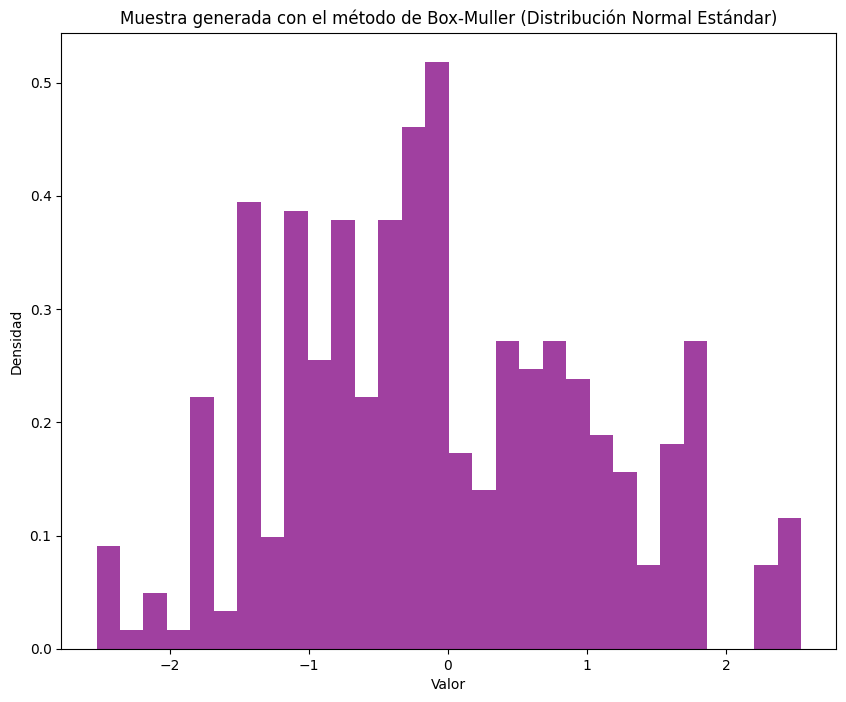

In [40]:
esperanzaLargos = np.mean(largos)
esperanzaAnchos = np.mean(anchos)

varLargos = np.var(largos)
varAnchos = np.var(anchos)

anchosNormalizados = (anchos - esperanzaAnchos) / math.sqrt(varAnchos)

largosNormalizadas = (largos - esperanzaLargos) / math.sqrt(varLargos)

# Aplicar la transformación de Box-Muller
Z0 = np.sqrt(-2 * np.log(anchosNormalizados)) * np.cos(2 * np.pi * largosNormalizadas)
Z1 = np.sqrt(-2 * np.log(anchosNormalizados)) * np.sin(2 * np.pi * largosNormalizadas)

# Combinar Z0 y Z1 para tener 1000 muestras en total
Z = np.concatenate((Z0, Z1))

# Graficar el histograma de la muestra generada (debería aproximarse a una distribución normal estándar)
plt.figure(figsize=(10, 8))
plt.hist(Z, bins=30, density=True, alpha=0.75, color='purple')
plt.title('Muestra generada con el método de Box-Muller (Distribución Normal Estándar)')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()



Teniendo en cuenta que box muller requiere de una distribucion uniforme con muestras independientes entre si,  al aplicar box muller y obtener exitoasmente una normal estandar se puede confirmar la hipotesis de que las muestras de la uniforme son independientes entre si.